## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2024-25 учебный год

## Формат сдачи

Сам ноутбук называйте в формате hw-03-USERNAME.ipynb, где USERNAME — ваши фамилия и имя. Файл надо будет сдать в anytask.

## О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn, а также познакомитесь с plotly.

EDA - важный этап работы с данными. Именно в процессе EDA вы можете выяснить особенности датасета, найти зависимости в данных, протестировать гипотезы о взаимосвязях признаков и целевой переменной. В реальности вы сами будете определять, что и как проверять в рамках EDA, однако в данной работе гипотезы будут выдвинуты за вас автором задания. Также и типы графиков, которые вы будете использовать уже предопределены за вас. Выполняя задания по визуализациям, обращайте внимание на референсные картинки, которые были оставлены авторами. Они показывают, какой примерно результат от вас ожидается.

Это задание будет включать в себя построение некоторого количества графиков, потому вот основные правила, в соответствии с которыми графики должны быть оформлены:
1. Любой график всегда имеет название.
2. Оси у графика подписаны (исключение - график делит название оси с соседним).
3. Подписи делаются на одном языке (либо английский, либо русский), но не на их смеси.
4. Если вы выводите несколько графиков, то они размещаются в рамках одного объекта matplotlib.pyplot.figure. Вы не выводите графики последовательно, а смотрите, как их разместить сразу все за раз.
5. Отдельные графики (если графиков на картинке больше 1) также имеют свои названия.
6. Если на графике есть несколько различных объектов, то для их различения используется легенда. Помещайте легенду в место, где она в наименьшей мере мешает восприятию самого графика.
7. Если есть легенда, то она должна иметь навание, а также ее содержание должно быть адекватными (пожалейте проверяющих, они не хотят разбирать, а к чему относится зеленая линия, которая на легенде помечена меткой "0").
8. Используйте цветовые гаммы, чтобы объекты на графиках отличались цветом.
9. Текст на визуализации должен быть читаем. Если вы вывели названия категорий в качестве подписей на оси Х, а эти названия наезжают друг на друга, то вам нужно что-то с этим сделать. Нечитаемый или плохо читаемый (очень маленький, невероятно огромный) текст ведет к снижению баллов.

При работе с табличными данными используйте функционал [style](https://pandas.pydata.org/docs/user_guide/style.html#Builtin-Styles), чтобы визуально выделять необходимые элементы.

В этом задании будут оцениваться ваши развернутые комментарии, размышления и выводы (по построенным графикам): не скупитесь на них, но следите, чтобы выводы не были поверхностными и очевидными.

*Тут правило про плагиат, которое вам итак известно - обнуляются все работы, которые подозреваются в некорректных заимствованиях!* Помните, что просто скопировать код из интернета и указать источник - это не ваша самостоятельная работа, а автора кода. Измените хоть что-нибудь в коде.

## О данных

Будем работать с [датасетом физической активности](https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones).

В этом датасете собраны данные 30 человек, выполняющих различные действия со смартфоном на поясе. Данные записывались с помощью датчиков (акселерометра и гироскопа) в этом смартфоне. Были зафиксированы: "3-осевое линейное ускорение" (_tAcc-XYZ_) и "3-осевая угловая скорость" (_tGyro-XYZ_).

1. Все сигналы отсортированы по времени, пропущены через фильтр шума.
2. Все наблюдения были разделены на окна по 128 сигналов в каждом, причем окна пересекаются на 50% (грубо говоря, с 1 по 128 сигнал в 1 окно, с 64 до 192 сигнала - во 2 окно и так далее). То есть каждое окно покрывает 2.56 секунды данных (два шага человека при ходьбе, учитывая медленную походку пожилых людей).
3. Линейное ускорение было разделено на две составляющие (с помощью низкочастотного фильтра): ускорение самого тела, а также гравитационная составляющая. Будем называть их ускорением тела и гравитационным ускорением.
4. К получившимся окнам применяли различные функции для получения следующих показателей:
    - max
    - min
    - mad (median)
    - mean
    - std
    - skewness (коэффициент асимметричности распределения признака в окне)
    - etc. (подробнее, на сколько это возможно, указано в [самой статье](https://www.esann.org/sites/default/files/proceedings/legacy/es2013-84.pdf))
5. Величина (magnitude) сигнала также определялась через евклидову норму всех значений из вектора для одного окна.
6. К окнам было применено преобразование Фурье, чтобы получить частоты. Из частот были извелченыте же показатели, плюс новые:
    - bandsEnergy (энергия частотного интервала)
7. Были посчитаны углы между векторами соответствующих окон.
8. Для ускорений были посчитаны производные - рывки, к которым применялись те же функции.

Итог: в датасете каждый признак - это какая-то операция над вектором из 128 чисел, которые соответствуют замерам определенного человека занятого какой-то активностью на протяжении 2.56 секунд.

Как читать названия признаков? Примеры:
- `tBodyAccMag-mean()` - это вектор ускорений тела (без гравитационной составляющей этого ускорения), из которого взяли евклидову норму, а затем усреднили, чтобы получить скаляр
- `fBodyAcc-bandsEnergy()-1,8.2` - это вектор ускорения тела, к которому применили преобразование Фурье, преобразовав его в вектор частот, а затем посчитали на этом векторе энергию данного частотного интервала в определенном диапазоне частот (в данном случае 1 - 8.2)
- `angle(X,gravityMean)` - это угол между осью Х и вектором усредненных значений гравитационного ускорения из соответствующего окна

Вероятно, сначала покажется сложным, но мы разберемся с некоторыми признаками в отдельности и вы сможете понять их смысл, уже исходя из фактических соотношений.

## Предобработка данных

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as plx

import warnings
warnings.filterwarnings("ignore")
# plt.rcParams['text.usetex'] = True

In [ ]:
df = pd.read_csv(r'D:\python_main\training_env\Introduction-to-Machine-learning-and-Statistics\data\train.csv')
test = pd.read_csv(r'D:\python_main\training_env\Introduction-to-Machine-learning-and-Statistics\data\test.csv')

# train = pd.read_csv('train.csv')
# test = pd.read_csv("test.csv")

In [ ]:
df.shape

(7352, 563)

В датасете 563 признака, включая целевую переменную. Столько признаков нам не нужно. Мы за вас сделали подвыборку признаков для удобства работы с ними.

In [11]:
cols_subset = [
    'tBodyAccMag-mean()',  # усредненная величина ускорения тела
    'tBodyGyroJerk-mad()-X',  # медианная величина рывка тела по оси Х
    'tGravityAcc-min()-X',  # минимум гравитационной составляющей ускорения по оси Х
    'tBodyAcc-max()-X',  # максимальная величина ускорения тела по оси Х
    'fBodyAcc-bandsEnergy()-1,8.2',  # энергия ускорения тела в интервале частоты
    'angle(X,gravityMean)',  # угол между осью Х и усредненной гравитационной составляющей ускорения
    'angle(Y,gravityMean)',  # угол между осью Y и усредненной гравитационной составляющей ускорения
    'angle(Z,gravityMean)',  # угол между осью Z и усредненной гравитационной составляющей ускорения,
    'fBodyAcc-skewness()-X',  # асимметричность частоты ускорения тела по оси Х
    'subject',  # номер испытуемого
    'Activity',  # название вида деятельности (целевая переменная)
]

In [ ]:
df = df[cols_subset]
test = test[cols_subset]

In [ ]:
df.sample(5)

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  tGravityAcc-min()-X  \
2666            0.335424              -0.551733             0.936182   
371            -0.986548              -0.989547             0.942725   
2929           -0.994783              -0.994728             0.987189   
1986           -0.289194              -0.501847             0.943961   
3437           -0.982383              -0.995881             0.945150   

      tBodyAcc-max()-X  fBodyAcc-bandsEnergy()-1,8.2  angle(X,gravityMean)  \
2666          0.638935                     -0.695213             -0.810403   
371          -0.943241                     -0.999698             -0.680539   
2929         -0.942588                     -0.999763             -0.878264   
1986         -0.362674                     -0.850624             -0.738200   
3437         -0.940314                     -0.999142             -0.704093   

      angle(Y,gravityMean)  angle(Z,gravityMean)  fBodyAcc-skewness()-X  \
2666              0.207597             -0.057042               0.510717   
371               0.308780             -0.048856              -0.344766   
2929              0.117708              0.104452              -0.469657   
1986              0.234207             -0.105188              -0.365952   
3437              0.297943              0.061830              -0.293870   

      subject            Activity  
2666       15  WALKING_DOWNSTAIRS  
371         3            STANDING  
2929       16             SITTING  
1986       11             WALKING  
3437       17            STANDING

### Задание 1 (0.5 балла)

Посмотрите на пропуски и дубли в данных train и test. Есть ли они? Если есть, напишите, с чем это может быть связано? Если нет, то просто напишите, что пропусков и/или дублей нет.

In [ ]:
print(f'Суммарное количество пропусков в обоих датасетах равно {df.isna().sum().sum() + test.isna().sum().sum()}. Пропусков нет')
print(f'Суммарное количество дублей в обоих датасетах равно {df.duplicated().sum() + test.duplicated().sum()}. Дубликатов нет')

Суммарное количество пропусков в обоих датасетах равно 0. Пропусков нет
Суммарное количество дублей в обоих датасетах равно 0. Дубликатов нет


### Задание 2 (0.5 балла)

Выведите основные статистики данных: среднее, медиана, перцентили (0.25, 0.5, 0.75), минимум, максимум, стандартное отклонение. Посмотрите на таблицу и напишите, видите ли вы в ней что-нибудь интересное.

Не рассматриваю колонку 'subject', т.к. в ней просто зарегистрирован номер человека

In [ ]:
pd.concat([df, test]).describe().T.iloc[:-1].style.background_gradient('Blues')

In [ ]:
df.describe().T.iloc[:-1].style.background_gradient('autumn')

In [17]:
test.describe().T.iloc[:-1].style.background_gradient('autumn')

__ОТВЕТ про интересное__:

-

### Задание 3 (0.5 балла)

Данные сбалансированы? У вас есть 6 категорий активности (целевая переменная). Если одна из категорий представлена большим количеством наблюдений, а остальные - нет, то это обстоятельство, о котором хотелось бы знать заранее. Гиперболизированный пример: представьте, что у вас 1000 наблюдений, разделенных на два класса, и только 5 принадлежат ко второму классу. Как учить модель на такой выборке? Есть сильное подозрение, что многие модели будут склонны вырождаться в константу. Отсюда и необходимость проверять баланс классов.

Выведите количество наблюдений для всех категорий активности в train и test. Посчитайте разницу в процентах между самой крупной категорией и самой маленькой (самая большая категория - это 100%). Если разница (округленная до ближайшего целого числа) не превышает 30%, то давайте для наших целей считать, что данные сбалансированы. Напишите, сбалансированы ли данные в train и test.

In [ ]:
all_activities_train = df.groupby('Activity').size().to_frame().rename(columns={0: 'size'})
all_activities_train

size
Activity                
LAYING              1407
SITTING             1286
STANDING            1374
WALKING             1226
WALKING_DOWNSTAIRS   986
WALKING_UPSTAIRS    1073

In [19]:
round(all_activities_train.min() * 100 / all_activities_train.max())

size    70.0
dtype: float64

In [20]:
all_activities_test = test.groupby('Activity').size().to_frame().rename(columns={0: 'size'})
all_activities_test

size
Activity                
LAYING               537
SITTING              491
STANDING             532
WALKING              496
WALKING_DOWNSTAIRS   420
WALKING_UPSTAIRS     471

In [21]:
round(all_activities_test.min() * 100 / all_activities_test.max())

size    78.0
dtype: float64

__ОТВЕТ__: разница не превышает 30% в обоих выборках, данные сбалансированы

### Задание 4 (0.5 балла)

Посчитайте корреляции всех признаков (включая таргет) со всеми другими. Какими получились значения? Есть идеи, почему так? Напишите ваши мысли.

In [ ]:
np.random.seed(52)
cmap = np.random.choice(plt.colormaps, size=1)[0]
corr_table = df.corr(numeric_only=True).style.background_gradient(cmap=np.random.choice(plt.colormaps, size=1)[0])
corr_table

- значения получились хорошими, в диапазоне -1 1, потому что это корреляция и другого не дано
- есть признаки, между которыми сильная линейная связь, наверное потому что они вместе хорошо описывают какую-то группу активностей

Поздравляем! Вы предобработали данные для максимально комфортного их последующего анализа. Теперь вы готовы приступить к Exploratory Data Analysis!

## Exploratory Data Analysis

### Задание 5 (0.5 балла)

Вы проверили основную информацию о данных и составили свое первое впечатление о них. Теперь визуализации.

Начнем рисовать графики с небольшой разминки. Выберите две любые математические функции (отличные от линейной) и нарисуйте их на одном графике. Подпишите каждый из графиков, чтобы было понятно, какие функции вы выбрали. Ниже будет пример.

In [23]:
from scipy import stats
from math import cosh

x_massive = np.linspace(-4 , 4, 1000)

y_cosh = np.zeros(1000)

norm_rv_pdf = stats.norm(0, 1).pdf(x_massive)
for i in range(1000):
    y_cosh[i-1] = cosh(x_massive[i-1]) / 27

In [24]:
y_cosh[:15]

array([1.01141603, 1.00335438, 0.99535707, 0.98742359, 0.97955344,
       0.9717461 , 0.96400108, 0.95631788, 0.94869601, 0.94113497,
       0.93363429, 0.92619348, 0.91881207, 0.91148957, 0.90422553])

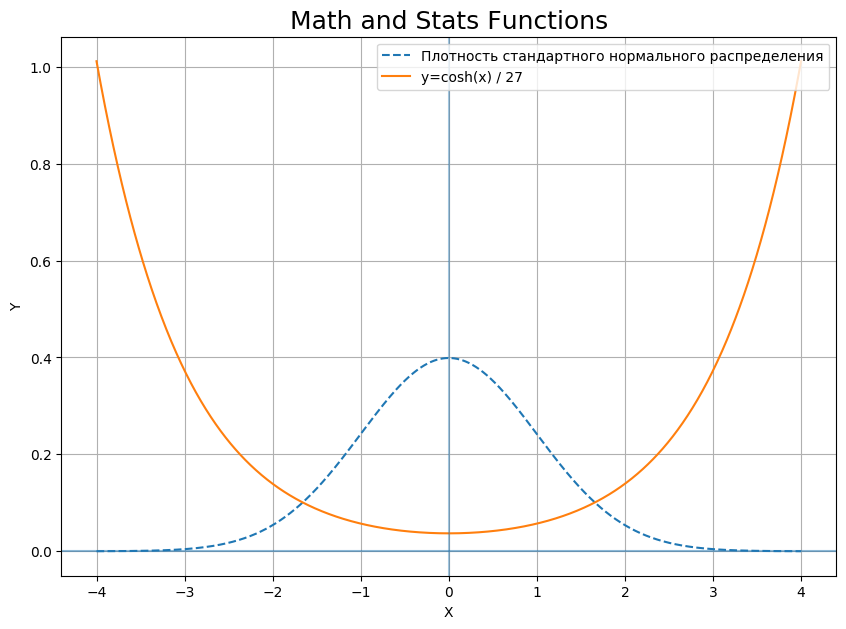

In [ ]:
plt.style.use('_classic_test_patch')
plt.figure(figsize=(10, 7))

plt.plot(x_massive, norm_rv_pdf, label='Плотность стандартного нормального распределения', linestyle='dashed')
plt.plot(x_massive, y_cosh, label='y=cosh(x) / 27')

plt.grid()
plt.title('Math and Stats Functions', fontsize=18)
plt.legend(loc=1)
plt.axvline(0, alpha=0.4, ymin=0)
plt.axhline(0, alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### Задание 6 (0.5 балла)

Ранее мы уже проверили сбалансированность данных по разным категориям активностей в train и test сетах. Теперь визуализируйте количество сэмплов в каждой из категорий отдельно для train и test сетов, как в примере ниже. Проследите, чтобы порядок категорий слева и справа был одинаков. Иначе не очень удобно их сравнивать (когда они в разных местах двух графиков). Также заметьте, что в примере ось Х в одинаковом масштабе, что тоже удобно для сравнения.

Вам может пригодиться:
- plt.barh или ax.barh

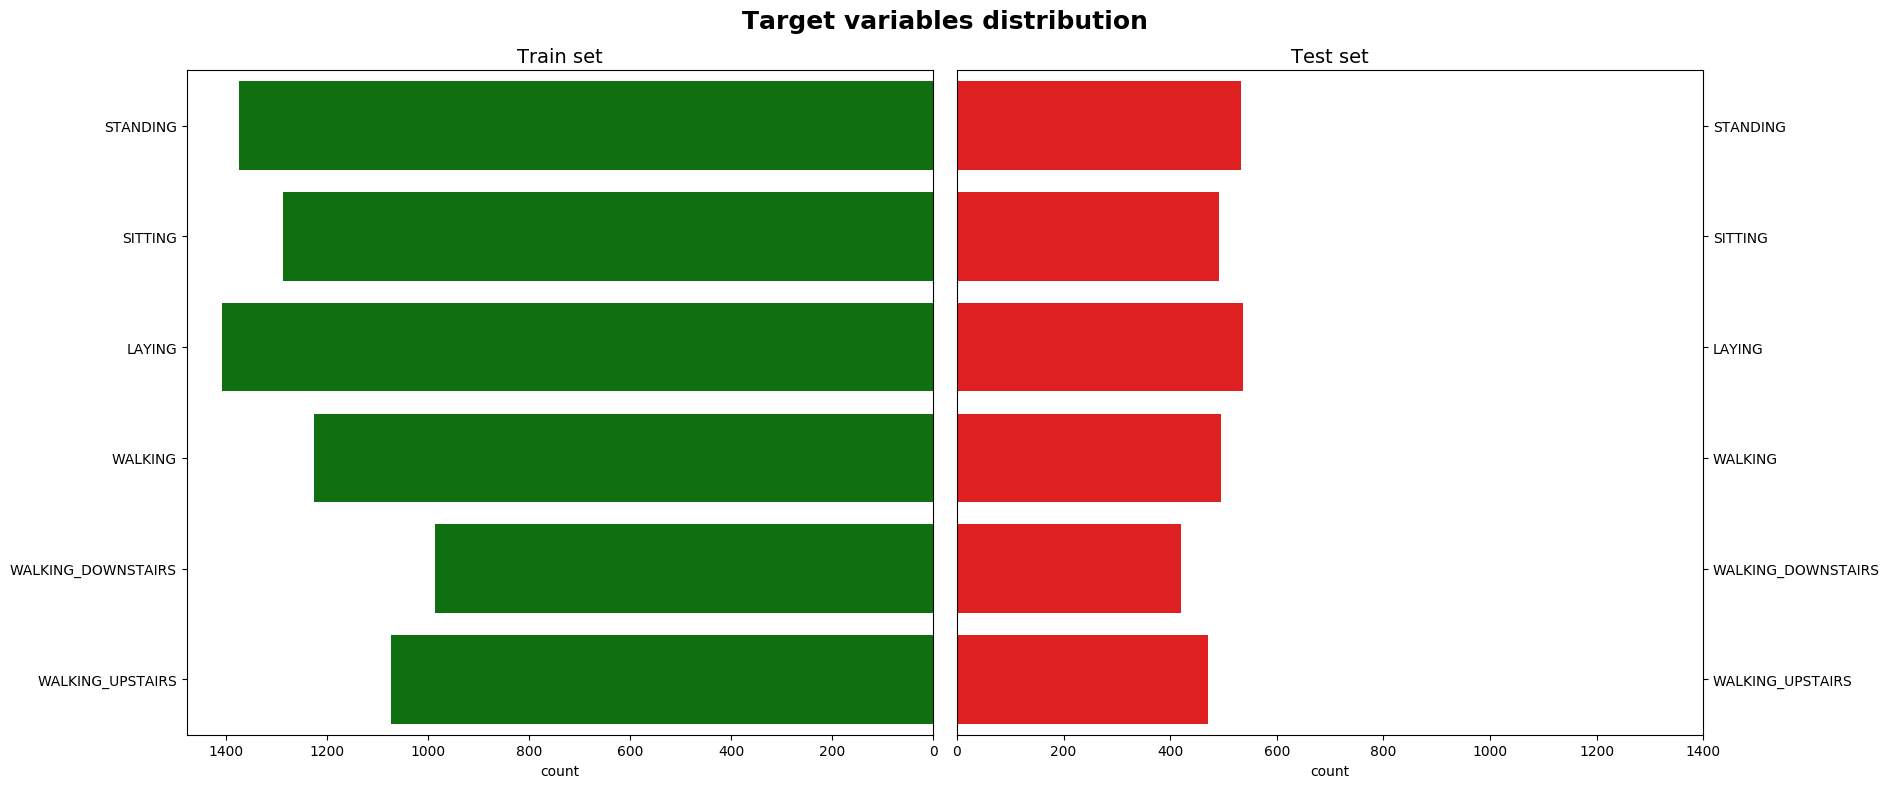

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(19, 8))

sns.countplot(data=df, y='Activity', ax=ax[0], color='green')
ax[0].invert_xaxis()
ax[0].set_title('Train set', color='black', fontsize=14)
ax[0].set_ylabel('')


sns.countplot(data=test, y='Activity', ax=ax[1], color='red')
ax[1].set_title('Test set', color='black', fontsize=14)
ax[1].set_ylabel('')
ax[1].yaxis.tick_right()
# ax[1].invert_xaxis()
ax[1].set_xlim(0, 1400)

plt.suptitle('Target variables distribution', weight='bold', fontsize=18)
plt.tight_layout()
plt.show()

Правда на таких графиках проще проверять баланс классов таргета?)

Так точно!

### Задание 7 (0.5 балла)

Ранее вы выводили таблицу корреляций. Однако просто таблица корреляций не очень удобна для анализа. Что, если признаков было бы больше? Визуализируйте heatmap корреляций. Подпишите значения корреляций, округленные до 2 знаков после запятой, на графике и оставьте только те значения, которые по модулю не меньше 0.5. Будем считать такие корреляции существенными. Если будете брать код из семинарского ноутбука, то поменяйте в нем что-нибудь, например, цветовую гамму, иначе проверяющий будет карать :)

Какой признак стоит исключить из рассмотрения корреляций? Напишите его название, а также причину, почему нет смысла его рассматривать.

Вам может пригодиться:
- sns.heatmap
- методы get_text и set_text у атрибута texts графика

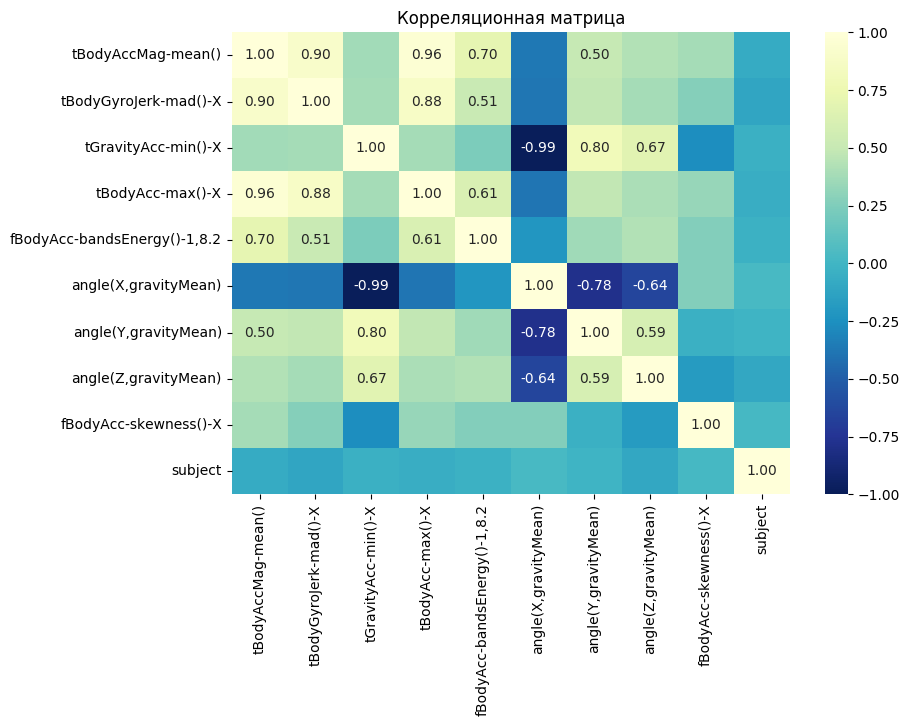

In [ ]:
plt.figure(figsize=(9, 6))

fig = sns.heatmap(df.corr(numeric_only=True), cmap='YlGnBu_r', vmin=-1, annot=True, fmt='.2f')

plt.title('Корреляционная матрица')

for text in fig.texts:
    value = text.get_text()
    if abs(float(value)) >= 0.5:
        continue
    else:
        text.set_text('')

plt.grid(False)
plt.show()

__ОТВЕТ__: исключить из рассмотрения стоит признак 'subject', т.к. это просто закодированная категориальная переменная, не несущая никакой взаимосвязи по значениям между остальными признаками.

### Задание 8 (0.5 балла)

Для начала будем стрелять из пушки по воробьям. Выведите pairplot по всем данным train сета. Напишите, заметили ли вы в нем что-нибудь интересное, чего не было в таблицах и графиках ранее, а также сообщите, было ли вам удобно анализировать 100 графиков.

In [31]:
sns.set_style('ticks')

<Figure size 1100x800 with 0 Axes>

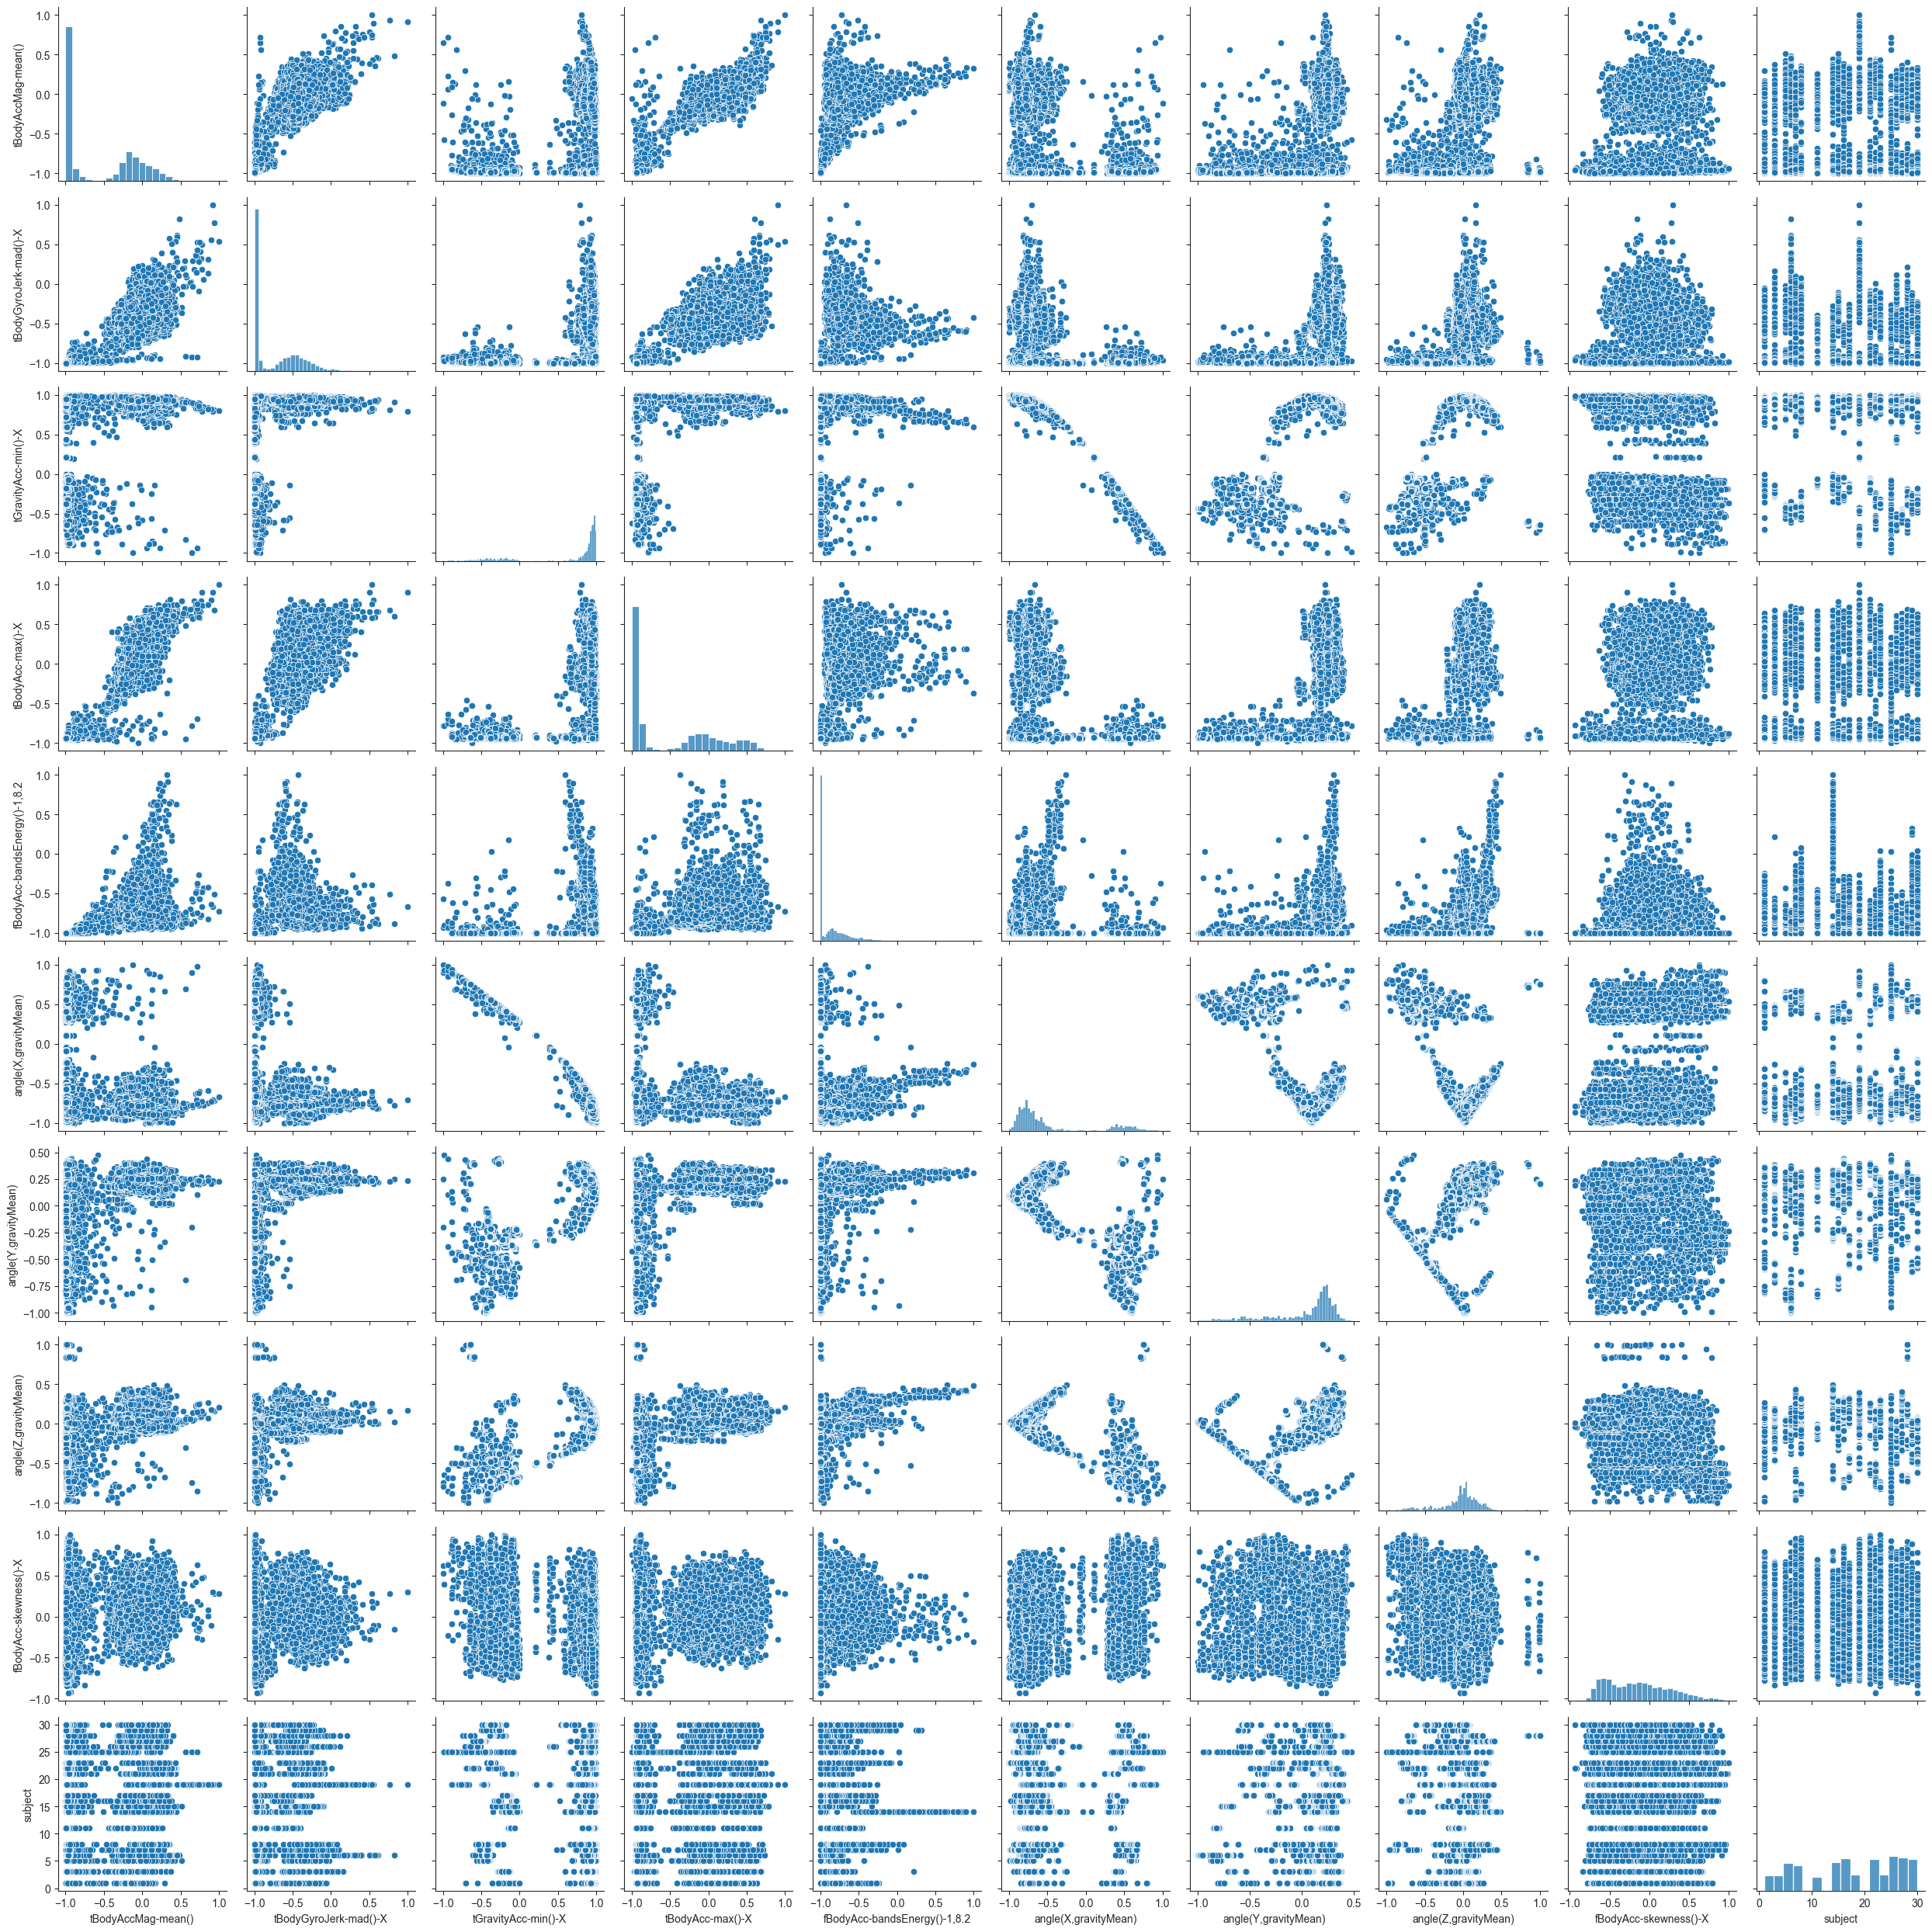

In [ ]:
plt.figure(figsize=(11, 8))

sns.pairplot(data=df)
plt.tight_layout()
plt.grid(False)
plt.show()

__ОТВЕТ__:

- было не удобно
- очень мало признаков, где, не смотря изначально на корреляционную матрицу, по диаграммам рассеивания можно выделить какие-то четкие *линейные* взаимосвязи между признаками, сразу понятно, что над признаками в основном проводили нормализацию/стандартизацию
- множество признаков дают понять о разделение целевой переменной/каких-то определенных наблюдений на 2-3 группы. Это менее заметно в диагональных гистограммах (резкий всплеск плотности у околонулевых значений, затухание и потом плавный горбик где-то в середине), но зато ярко выражено на корреляционных облаках: практически везде есть какая-либо линия из признаков, затем разрыв и далее либо очередное скоплени, либо хаотично разбросанная вероятностная масса. В качестве примера этому могу привести взаимосвязи признака angle(Z,gravityMean) с tBodyGyroJerk-mad()-X, tBodyAcc-max()-X, или же tGravityAcc-min()-X с tBodyGyroJerk-mad(), angle(Y,gravityMean) ну и другие так далее.

### Задание 9 (1 балл)

Окей. Смотреть на все сразу не очень удобно. Кажется, нужно смотреть на признаки в отдельности и искать в них инсайты.

Попробуем проверить гипотезу. Отобразите плотность распределения (kde) `tBodyAccMag-mean()` для каждой из активностей, как в примере ниже. Видите закономерность? Можно ли поделить все активности на две группы? Если да, то проведите вертикальную линию, которая визуально неплохо разделяет эти группы.

Давайте первую группу называть статическими активностями, а вторую - динамическими.

Посчитайте, какую долю правильных ответов дает ваша вертикальная линия для разделения именно этих двух групп. С чем может быть связан полученный вами результат? Предположите логическое обоснование (почему именно данный признак так хорошо/плохо разделяет группы активностей).

Вам может пригодиться:
- sns.kdeplot
- `tBodyAccMag-mean()` - это вектор ускорений тела (без гравитационной составляющей этого ускорения), из которого взяли евклидову норму, а затем усреднили, чтобы получить скаляр

In [ ]:
df.sample(5)

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  tGravityAcc-min()-X  \
269            -0.151834              -0.199470             0.909779   
7057           -0.972294              -0.984571            -0.194033   
5161           -0.987402              -0.986116            -0.239636   
1873            0.100313              -0.489666             0.870332   
7275           -0.158960              -0.265265             0.976788   

      tBodyAcc-max()-X  fBodyAcc-bandsEnergy()-1,8.2  angle(X,gravityMean)  \
269           0.116508                     -0.794713             -0.655825   
7057         -0.922304                     -0.999637              0.419085   
5161         -0.928370                     -0.999708              0.457362   
1873          0.252712                     -0.430464             -0.662831   
7275          0.067465                     -0.597354             -0.867583   

      angle(Y,gravityMean)  angle(Z,gravityMean)  fBodyAcc-skewness()-X  \
269               0.312523              0.121727              -0.427752   
7057             -0.487729             -0.498714              -0.293366   
5161             -0.705414             -0.276271              -0.282382   
1873              0.187331              0.241464              -0.305874   
7275              0.189209              0.007656              -0.146961   

      subject            Activity  
269         1             WALKING  
7057       30              LAYING  
5161       25              LAYING  
1873        8  WALKING_DOWNSTAIRS  
7275       30             WALKING

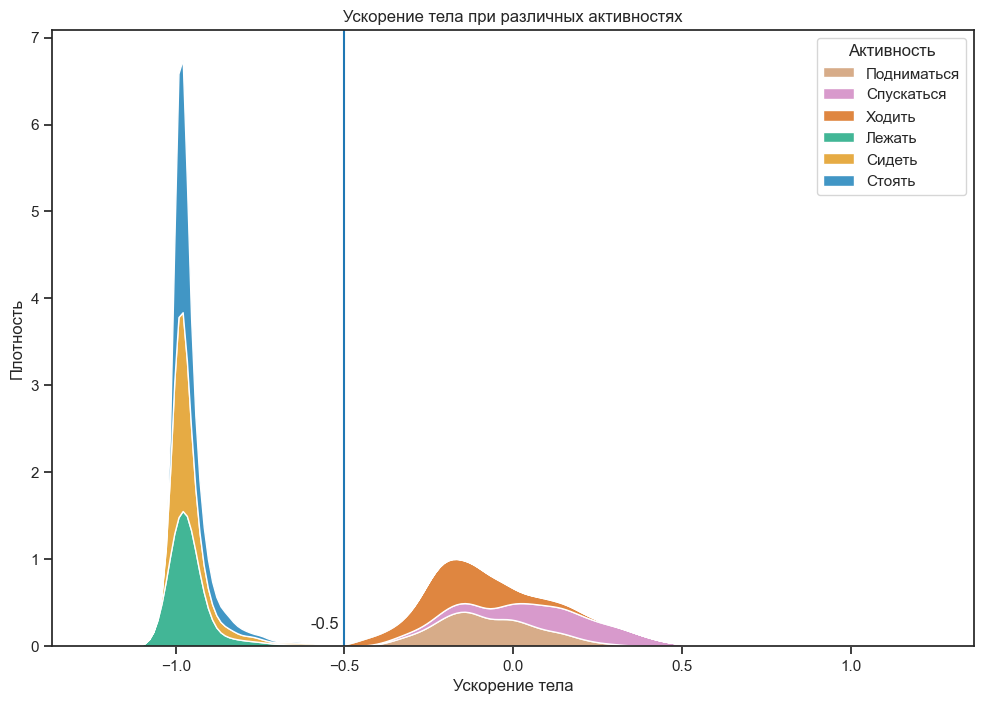

In [ ]:
plt.figure(figsize=(10, 7))

sns.kdeplot(data=df, x='tBodyAccMag-mean()', hue='Activity', palette='colorblind', multiple='stack')


plt.tight_layout()
plt.xlabel('Ускорение тела')
plt.ylabel('Плотность')
plt.axvline(x=-0.5)
plt.text(x=-0.6, y=plt.ylim()[0]+0.2, s='-0.5')
plt.legend(title ='Активность', labels=["Подниматься", "Спускаться","Ходить", "Лежать", 'Сидеть', 'Стоять'])
plt.title('Ускорение тела при различных активностях')
plt.show()

In [ ]:
round(df[(df['tBodyAccMag-mean()'] <= -0.5) & (df['Activity'].isin(['STANDING', 'SITING', 'LAYING']))].shape[0] / df.loc[df['Activity'].isin(['STANDING', 'SITING', 'LAYING'])].shape[0], 3)

0.985

То есть такой линией, проведенной по x=-0.5, мы отлавливаем больше 98% наблюдений, попадающих в группу статических активностей

In [ ]:
round(df[(df['tBodyAccMag-mean()'] > -0.5) & (df['Activity'].isin(['WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']))].shape[0] / df.loc[df['Activity'].isin(['WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'])].shape[0], 3)

1.0

При этом таким разделением мы покрываем все наблюдения, относящиеся к группе динамических активностей.

In [ ]:
df[df['Activity'].isin(['WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'])]['tBodyAccMag-mean()'].describe()
# дополнительно убедились в этом, т.к. min = -0.52

count    3285.000000
mean       -0.043422
std         0.204213
min        -0.529357
25%        -0.192557
50%        -0.078317
75%         0.088812
max         1.000000
Name: tBodyAccMag-mean(), dtype: float64

__ОТВЕТ__:

- так как данный признак является усредненным скаляром относительно ускорения тела по всем направлениям, кроме как раз таки гравитационного (которое будет всегда присутствовать, в независимости от того статистическую или динамическую активность выполняет человек), то очев, что в статических признаках никакого ускорения нет, а в динамических оно есть, и даже почти не нулевое

### Задание 10 (0.5 балла)

Поздравляем, вы проверили первую гипотезу в процессе EDA. Однако нам бы хотелось уметь не группы разделять, а каждый отдельный вид активности. Попробуйте нарисовать "ящики с усами" для `angle(X,gravityMean)` с разделением по разным видам активности на данных train. Можно ли сделать какой-то вывод по полученной визуализации? Проанализируйте и проинтерпретируйте полученные картинки (если заметили какую-то особенность, может какая-то категория значительно выделяется, то предположите, почему так могло произойти).

Вам может пригодиться:
- sns.boxplot
- угол между осью Х и усредненной гравитационной составляющей ускорения

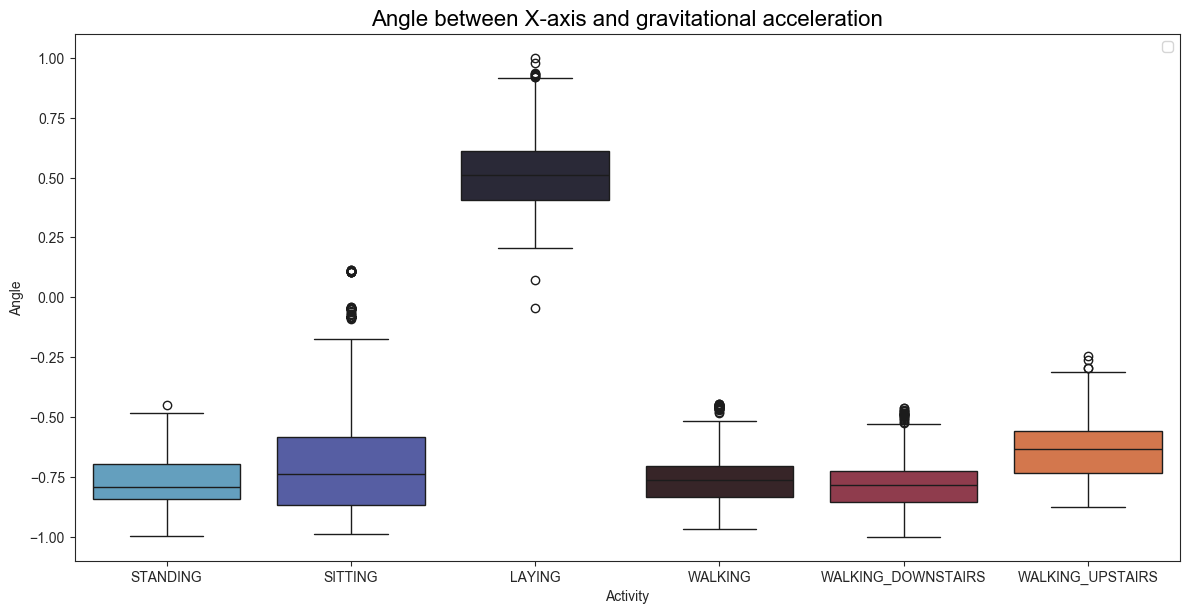

In [ ]:
sns.set_style('ticks')
plt.figure(figsize=(12, 6))

sns.boxplot(data=df, x='Activity', y='angle(X,gravityMean)', hue='Activity', palette='icefire')

plt.ylabel('Angle')
plt.xlabel('Activity')
plt.tight_layout()
plt.title('Angle between X-axis and gravitational acceleration', color='black', fontsize=16)
plt.legend()
plt.show()

__ОТВЕТ__:

- из визуализации значительно выделяется такая категория активности, как "LAYING", что в целом довольно ожидаемо. Т.к. все остальные категории активности человек совершает в основном в вертикальном положении, то их распределение угла относительно оси Х и гравитационной составляющей ускорения (которая направлена по Y вниз) будет примерно схожим.
- Конечно, слегка отличаются "SITING" и "WALKING_UPSTAIRS", ну потому что сидеть можно довольно по-разному и под разным углом наклона тела, поэтому там такой большой (относительно остальных) интерквартильный размах, а при подъёме, по лестнице например, наше тело наклоняется вперёд для балансировки и удержания равновесия
- отсюда и следует сильное отличие для "LAYING", т.к. лежим мы обычно в горизонтальном положение
- отдельно также можно взглянуть на выбросы, особенно для SITING и LAYING. Возможно, из-за того что смартфон находился на поясе, датчики при изменение положения человека с ситинга на лайинг или наоборот не совсем понимали, к какой именно активности относить это изменение, поэтому мы и регистрируем выбросы

### Задание 11 (0.5 балла)

Посмотрим теперь на `tBodyAcc-max()-X`. Визуализируйте скрипичные диаграммы для этого признака с разделением по активностям на всем train. Кажется логичным, что максимальное ускорение в моменте для разных активностей будет различаться. Однако есть ли активность, которая будет выделяться? Если да, то предложите объяснение, почему эта активность выделяется.

Вам может пригодиться:
- sns.violinplot
- 'tBodyAcc-max()-X',  # максимальная величина ускорения тела по оси Х

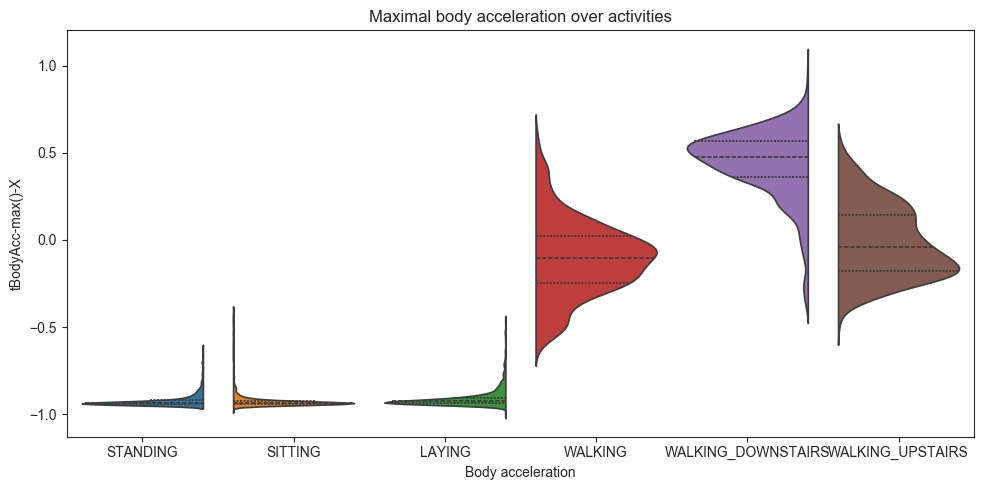

In [ ]:
plt.figure(figsize=(10, 5))

sns.violinplot(data=df, y='tBodyAcc-max()-X', x='Activity', hue='Activity', inner='quartiles', split=True)

plt.xlabel('Body acceleration')
plt.title('Maximal body acceleration over activities')
plt.tight_layout()
plt.show()

__ОТВЕТ__:
- в целом ожидаемо вся группа динамических активностей выделяется по ускорению относительно оси X. Однако внутри этой группы видим, как выделяются наблюдения, собранные в момент того, как люди спускались по лестнице. Медианное ускорение там ощутимо выше, что вплоне объясняется, т.к. спускаться сильно легче и быстрее, чем подниматься или просто ходить, соответственно выше вероятность того, что найдётся такая точка, в которой (может быть случайно) моментальное ускорение тела по оси Х будет сильно больше, чем при других видах активности. С другой стороны, не совсем очев, почему такая сильная разница, по сравнению с обычным хождением, ведь при подъёме/спуске движение по оси Х происходит по гипотенузе, а при обычной ходьбе - по прямой, ну да ладно
- вероятно, такая сильная разница, по сравнению с остальными динамическими активностями, для WALKING_DOWNSTAIRS связана с тем, что в процессе спуска наше тело постоянно совершает моментальное сильное ускорение (как на лестнице, когда мы встаём на одну ступеньку вниз: сначала по оси Х будет резкий рост максимального ускорения, но этот рост будет крайне непродолжительным), затем это ускорение снова падает и стабилизируется (мы фиксируемся на ступеньке, например), далее процедура повторяется.

### Задание 12 (1 балл)

Вы уже можете с довольно хорошим качеством выделить две категории активности из шести. Продолжим.

Ранее уже упоминалось разделение на две группы активностей: статические и динамические. Пришла пора разделить датасет train на две части. Сделайте это! Теперь на одной картинке покажите распределения `fBodyAcc-bandsEnergy()-1,8.2` для динамичных активностей (`boxenplot` - немного измененый "ящик с усами") и `angle(Y,gravityMean)` для статических - тут хватит и простой гистограммы (прямо, как в примере ниже). Можно ли выделить еще какие-то активности? Если да, напишите, какие активности на 1 и 2 графиках выделяются.

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec (заметили, что один график больше другого? попробуйте сами так сделать - вам понравится...)
- sns.boxenplot
- sns.histplot
- 'angle(Y,gravityMean)',  # угол между осью Y и усредненной гравитационной составляющей ускорения
- 'fBodyAcc-bandsEnergy()-1,8.2',  # энергия ускорения тела в интервале частоты

In [ ]:
train_dynamic = df[df['Activity'].isin(['WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'])]
train_static = df[df['Activity'].isin(['STANDING', 'SITTING', 'LAYING'])]
train_static['Activity'].unique()
assert train_static.shape[0] + train_dynamic.shape[0] == df.shape[0]

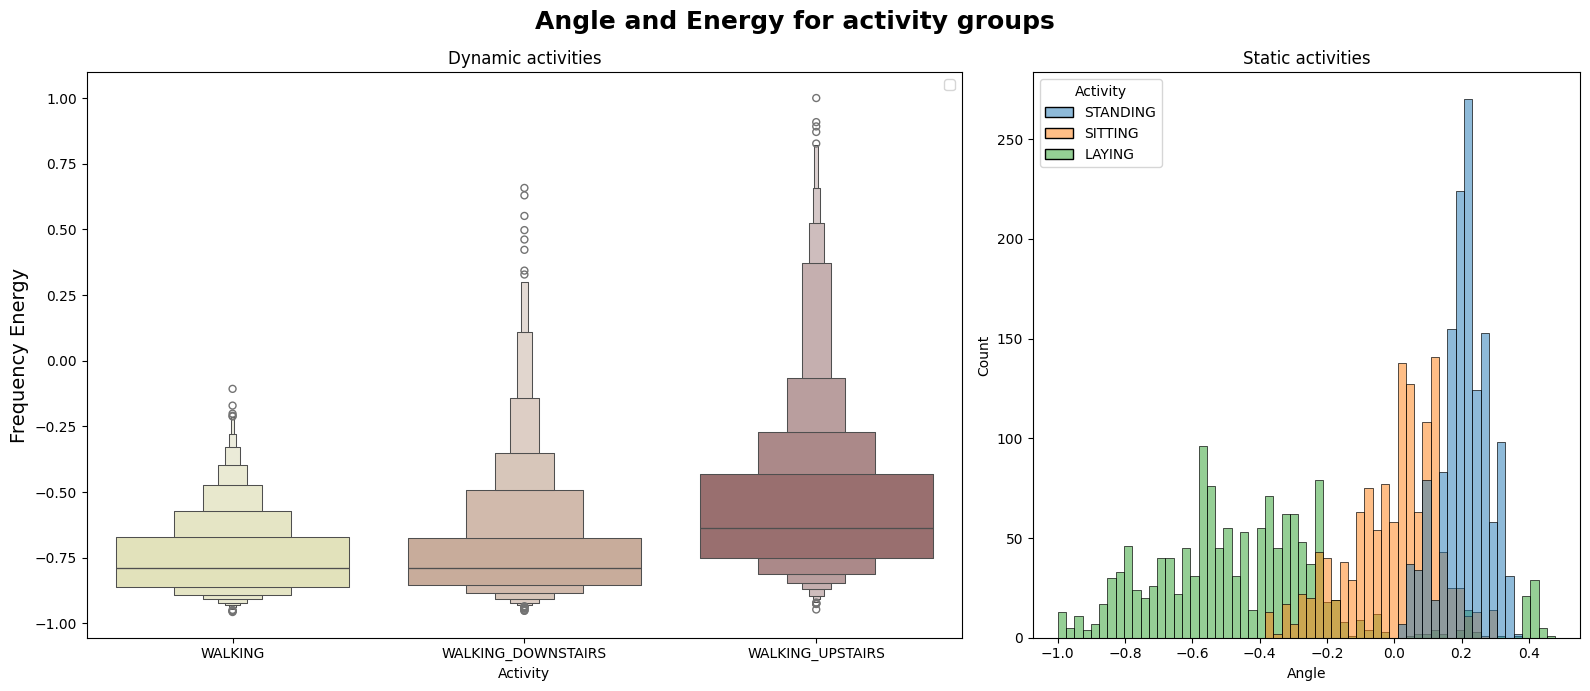

In [44]:
np.random.seed(52)

fig, ax = plt.subplots(1, 2, figsize=(16, 7), gridspec_kw={'width_ratios': [1.6, 1]})

sns.boxenplot(data=train_dynamic, y='fBodyAcc-bandsEnergy()-1,8.2', ax=ax[0], x='Activity', hue='Activity', palette=np.random.choice(plt.colormaps, size=1)[0])
ax[0].set_ylabel('Frequency Energy', fontsize=14)
ax[0].set_xlabel('Activity')
ax[0].legend()
ax[0].set_title("Dynamic activities", color='black')

sns.histplot(data=train_static, x='angle(Y,gravityMean)', hue='Activity', ax=ax[1], multiple='layer', bins=60)
ax[1].set_title('Static activities')
ax[1].set_xlabel('Angle')

plt.suptitle('Angle and Energy for activity groups', color='black', fontsize=18, weight='bold')
plt.tight_layout()
plt.show()

__ОТВЕТ:__

- по первому графику довольно четко можно выделить WALKING_UPSTAIRS, т.к. при подъёме человеке сильно больше энергии затрачивает, чем при других представленных динамических активностях
- ну а по второму графику можно standing выделить, как активность с наименьшей дисперсией угла между осью Y и гравитационным ускорением. Это вполне логично, т.к. стоя человек принимает максимально вертикальное положение, а сидеть можно с разным наклоном туловища, поэтому там и размах сильно больше

### Задание 13 (0.5 балла)

Не всегда жизнь будет такой легкой, а данные будут полностью или почти линейно разделимы в одному признаку (иначе чем бы занимались дата саентисты...). Часто данные вообще ни по одному признаку нельзя адекватно разделить (да и по комбинациям признаков тоже). Давайте попробуем взять не один признак, а целых два!

Рассмотрим только статические активности. Будет снова два графика сразу. На первом графике будет боксплот распределения `fBodyAcc-skewness()-X` по активностям. А на втором попробуем взять не все наблюдения данной группы активностей, а только их часть. Разделимы ли категории по `fBodyAcc-skewness()-X`? А если взять только те строки, где `fBodyAcc-skewness()-X < -0.376`, и теперь вывести боксплот распределения `angle(Y,gravityMean)` по разным активностям? Попробуйте и напишите, выделилась ли какая-то категория?

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec
- sns.boxplot
- 'fBodyAcc-skewness()-X',  # асимметричность частоты ускорения тела по оси Х
- 'angle(Y,gravityMean)',  # угол между осью Y и усредненной гравитационной составляющей ускорения

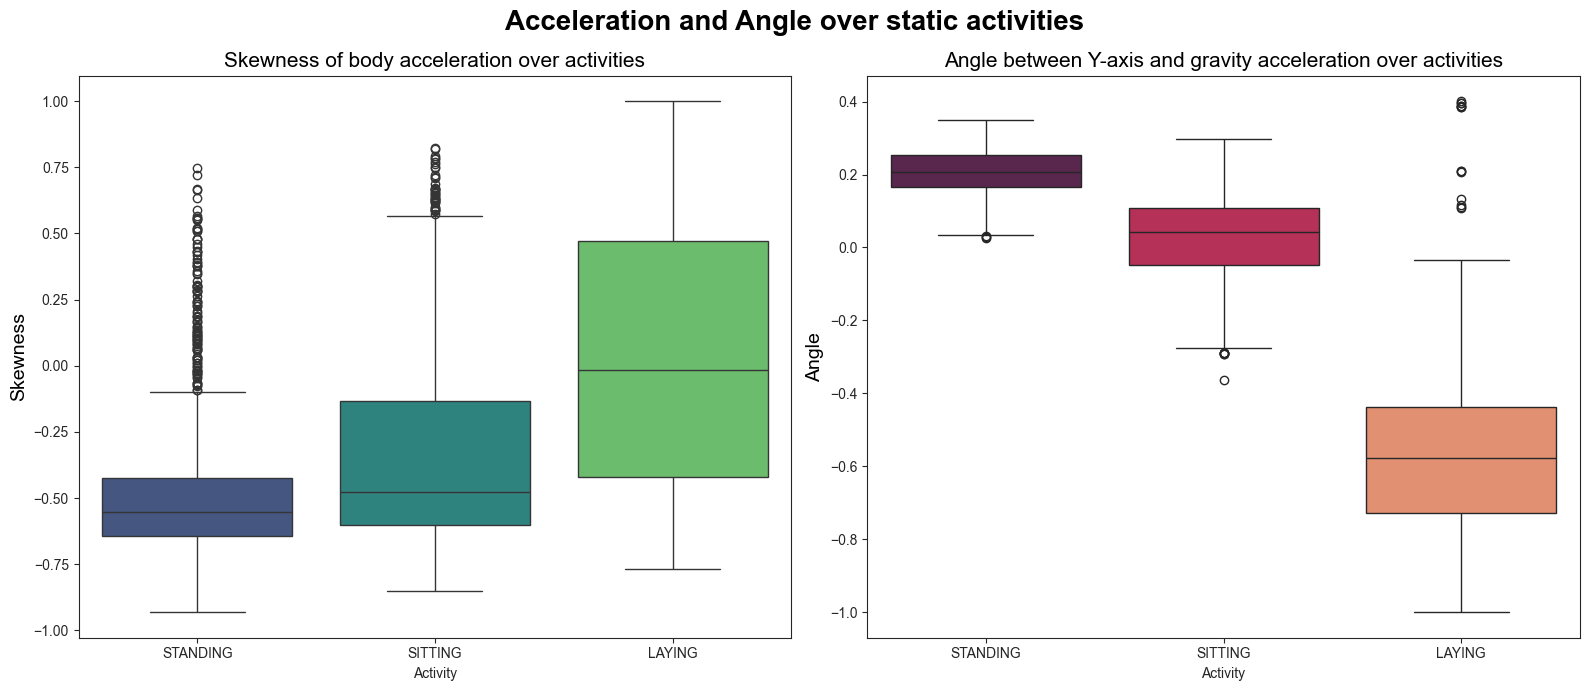

In [45]:
sns.set_style('ticks')
fig, ax = plt.subplots(1, 2, figsize=(16, 7))

sns.boxplot(train_static, x='Activity', y='fBodyAcc-skewness()-X', hue='Activity',ax=ax[0], palette='viridis')
ax[0].set_ylabel('Skewness', fontsize=14, color='black')
ax[0].set_title('Skewness of body acceleration over activities', color='black', fontsize=15)

sns.boxplot(train_static[train_static['fBodyAcc-skewness()-X'] < -0.376], x='Activity', y='angle(Y,gravityMean)', hue='Activity', palette='rocket')
ax[1].set_ylabel('Angle', color='black', fontsize=14)
ax[1].set_title('Angle between Y-axis and gravity acceleration over activities',  color='black', fontsize=15)

plt.suptitle('Acceleration and Angle over static activities', color='black', fontsize=20, weight='bold')
plt.tight_layout()
plt.show()

__ОТВЕТ__:

- такая процедура помогла нам выделить активность, у которой в распределении ассиметричности частоты ускорения по оси Х наблюдается сильная скошенность влево (т.е. почти никакой частоты ускорения там нет), а также сильно отрицательный угол наклона к оси Y относительного гравитационного ускорени. Очев, что это активность "Лежать", ведь обычно когда мы лежим мы никуда не ускоремся по Х и находимся противоположно оси гравитационного ускорения.

- У остальных двух категорий статистической активности примерно одинаковое распределение по признаку 'angle(Y,gravityMean)', т.к. по оси Х, когда мы сидим или просто стоим, у нас ускорения никакого нет (соответственно и скошенность влево по частоте), ну а угол относительно Y по гравитационному ускорению тоже ожидаемо околонулевой. Чуть больше у "Стоять" видимо связано с возможными наклонами тела для балансировки или при начале движения, когда еще активность не перешла в категорию "Ходить".
- также видим выбросы у standing и laying. Верю, что это по той же логике, которую я описывал для 10 задания: эти выбросы регистрировались смартфоном в момент перехода из одного положения в другое. И так как окна, в которые регистрировались сигналы, пересекаются между собой, то мы и видим выбросы по обеим "парным" активностям, т.е. сидеть-стоять; сидеть-лежать.

Поздравляем, теперь вы на шажок ближе к тому, чтобы стать решающим деревом!

### Задание 14 (1 балл)

Вот и осталась лишь одна активность, которую мы никак не выделили. Попробуем и ее какими-то порогами отделить от всех остальных. Да, можно было бы сказать, что, раз уж мы выделили 5 из 6 категорий, то все остальное - это и есть последняя категория, но мы не идем легкими путями. Выделить оставшуюсь категорию с хорошим качеством не так уж и просто. Из доступных признаков, сначала посмотрите на распределение `tBodyAcc-max()-X` на динамических активностях (скрипичная диаграмма отлично подойдет).

А теперь спускаем вам порог `tBodyAcc-max()-X < 0.157`. Для таких строк постройте диаграмму рассеяния для признака `tGravityAcc-min()-X`. Да, получается неидеально, но это честная работа. Можно выбрать порог так, чтобы чисто из таблицы с динамическими активностями из строк, где `tBodyAcc-max()-X < 0.157`, выбрать по некоторому порогу для `tGravityAcc-min()-X` строки так, чтобы доля правильных ответов на оставшейся категории была не меньше 83%!

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec
- sns.violinplot
- sns.swarmplot (иногда лучше подходит, чем просто sns.scatterplot)

Обратите внимание, что подписи к осям можно убирать методами plt. Например, если у вас общее название для оси Y для обоих графиков, то можно не подписывать ось Y у второго графика.

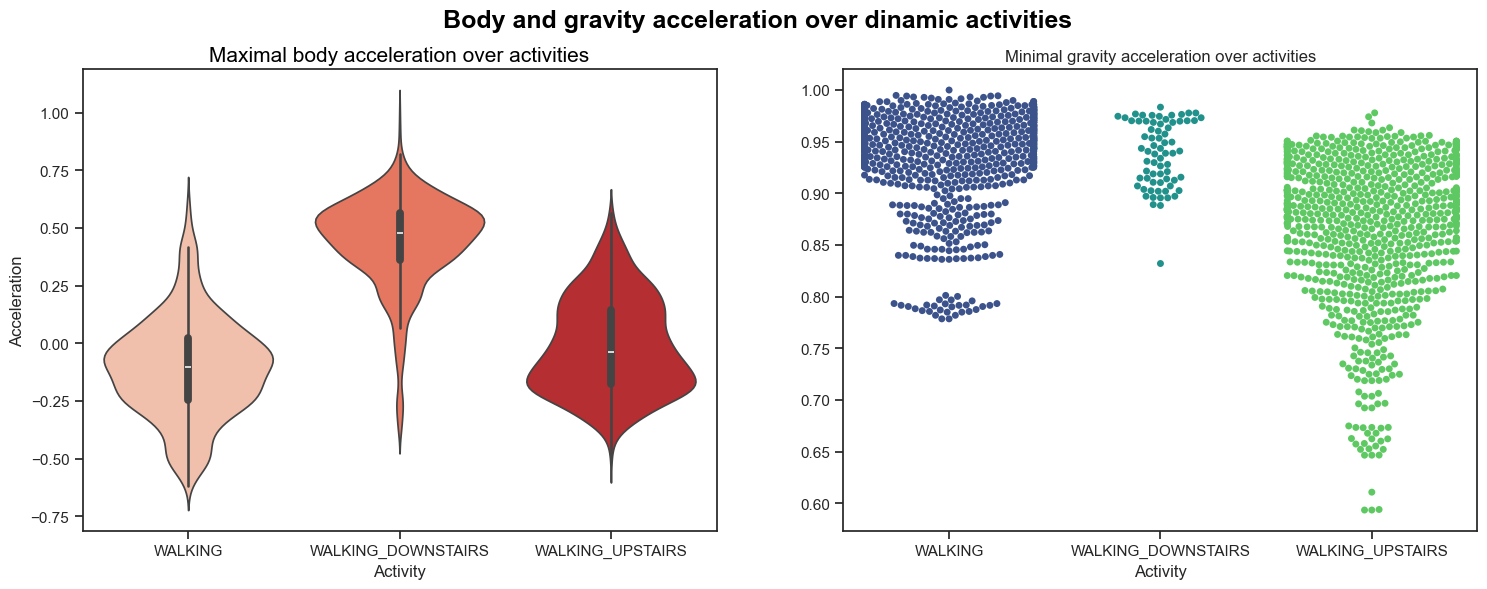

In [48]:
sns.set_context('notebook')
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

sns.violinplot(data=train_dynamic, x='Activity', y='tBodyAcc-max()-X', hue='Activity', ax=ax[0], palette='Reds')
ax[0].set_title('Maximal body acceleration over activities', color='black', fontsize=15)
ax[0].set_ylabel('Acceleration')

sns.swarmplot(data=train_dynamic[train_dynamic['tBodyAcc-max()-X'] < 0.157], y='tGravityAcc-min()-X', x='Activity', hue='Activity', ax=ax[1], palette='viridis')
ax[1].set_title('Minimal gravity acceleration over activities')
ax[1].set_ylabel('')

plt.suptitle('Body and gravity acceleration over dinamic activities', color='black', fontsize=18, weight='bold')
plt.show()

### Задание 15 (0.5 балла)

Теперь попробуем более интерактивные графики. Установите библиотеку `plotly` (обычно `pip install plotly` или `conda install plotly`). Синтаксис очень похож на `seaborn`, но вот [документация для plotly.express](https://plotly.com/python-api-reference/plotly.express.html).

Сначала подготовим данные для визуализации. Будем считать t-SNE просто "черным ящиком", который принимает наши данные и проецирует их в двумерное или трехмерное пространство. Возможно, придется немного подождать.

In [ ]:
%%time
from sklearn.manifold import TSNE
tsne = TSNE(random_state=666, n_components=2)
new = tsne.fit_transform(train.drop(['subject', 'Activity'], axis=1))
df_2_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y']),
    train['Activity']
], axis=1)

tsne = TSNE(random_state=666, n_components=3)
new = tsne.fit_transform(train.drop(['subject', 'Activity'], axis=1))
df_3_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y', 'z']),
    train['Activity']
], axis=1)

CPU times: user 4min 19s, sys: 536 ms, total: 4min 19s
Wall time: 4min 19s


Так как отрисовка графиков через плотли умирает при закрытии ноутбука, ну т.е. нужно запустить непосредственно, чтобы увидеть, то ниже я прикреплю скрины запусков из коллаба

In [ ]:
df_2_comp.columns

Index(['x', 'y', 'Activity'], dtype='object')

Теперь нарисуйте scatter-график через `plotly.express` для `df_2_comp` с выделением цветами активностей. Красиво получилось? Видны скопления точек одного цвета? Можно разные активности отделить линиями на данном графике?

In [ ]:
plx.scatter(data_frame=df_2_comp, x='x', y='y', color='Activity')

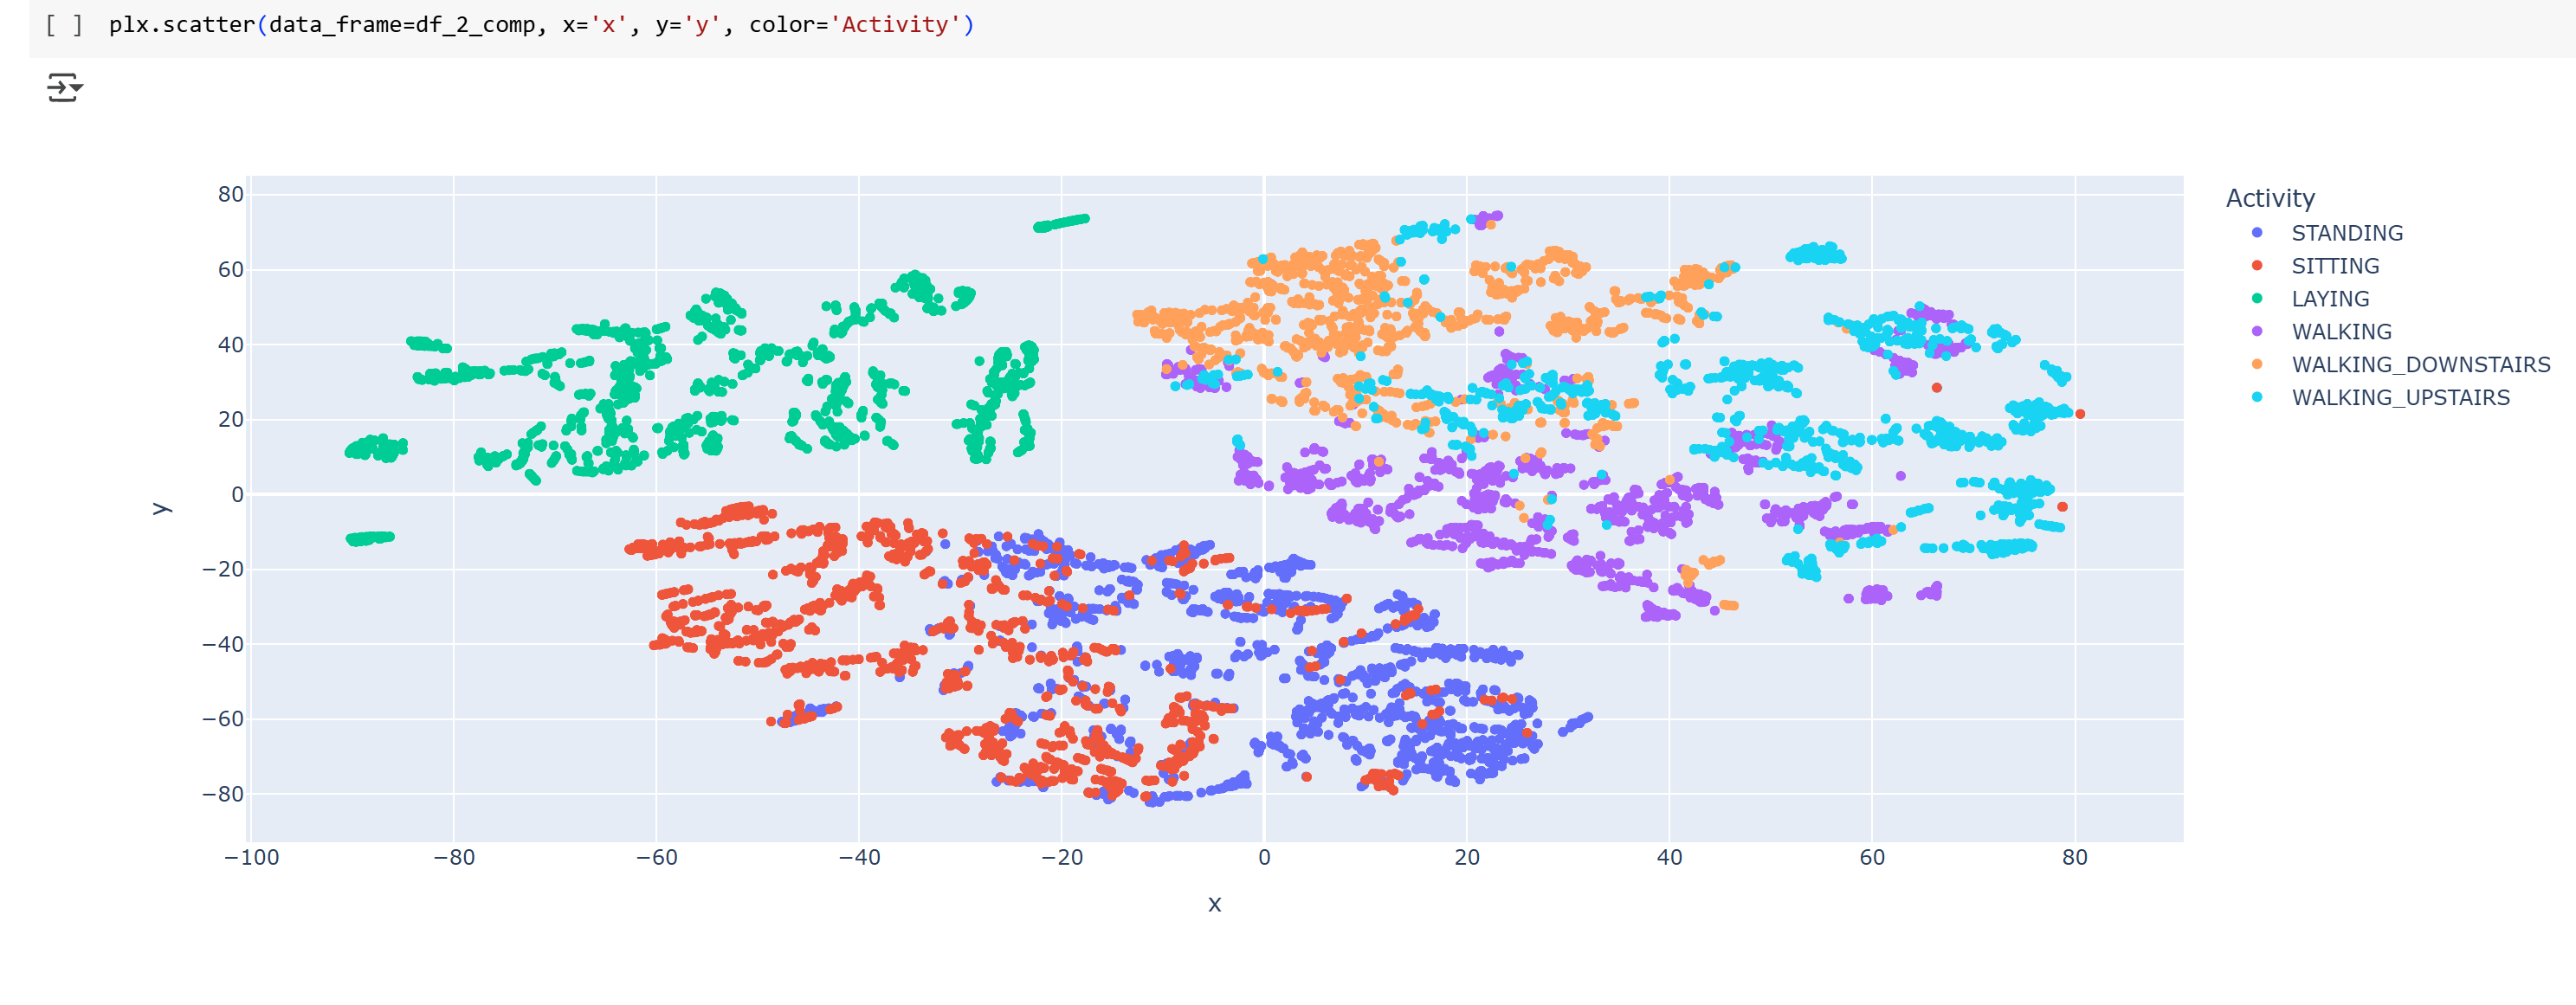

__ОТВЕТ:__

- красиво
- да, вполне отчётливо видны
- можно

Мы не отстаем от трендов и тоже можем в 3D. Сейчас и вы научитесь (если еще не умеете). Нарисуйте scatter_3d-график через `plotly.express` для `df_3_comp` с выделением цветами активностей. Повращайте его. Нормально получилось? Есть ли какая-то структура у точек?

In [ ]:
fig = plx.scatter_3d(data_frame=df_3_comp, x='x', y='y', z='z', color='Activity')

fig.update_layout(
    width=1100,  # Ширина в пикселях
    height=950  # Высота в пикселях
)

fig.show()

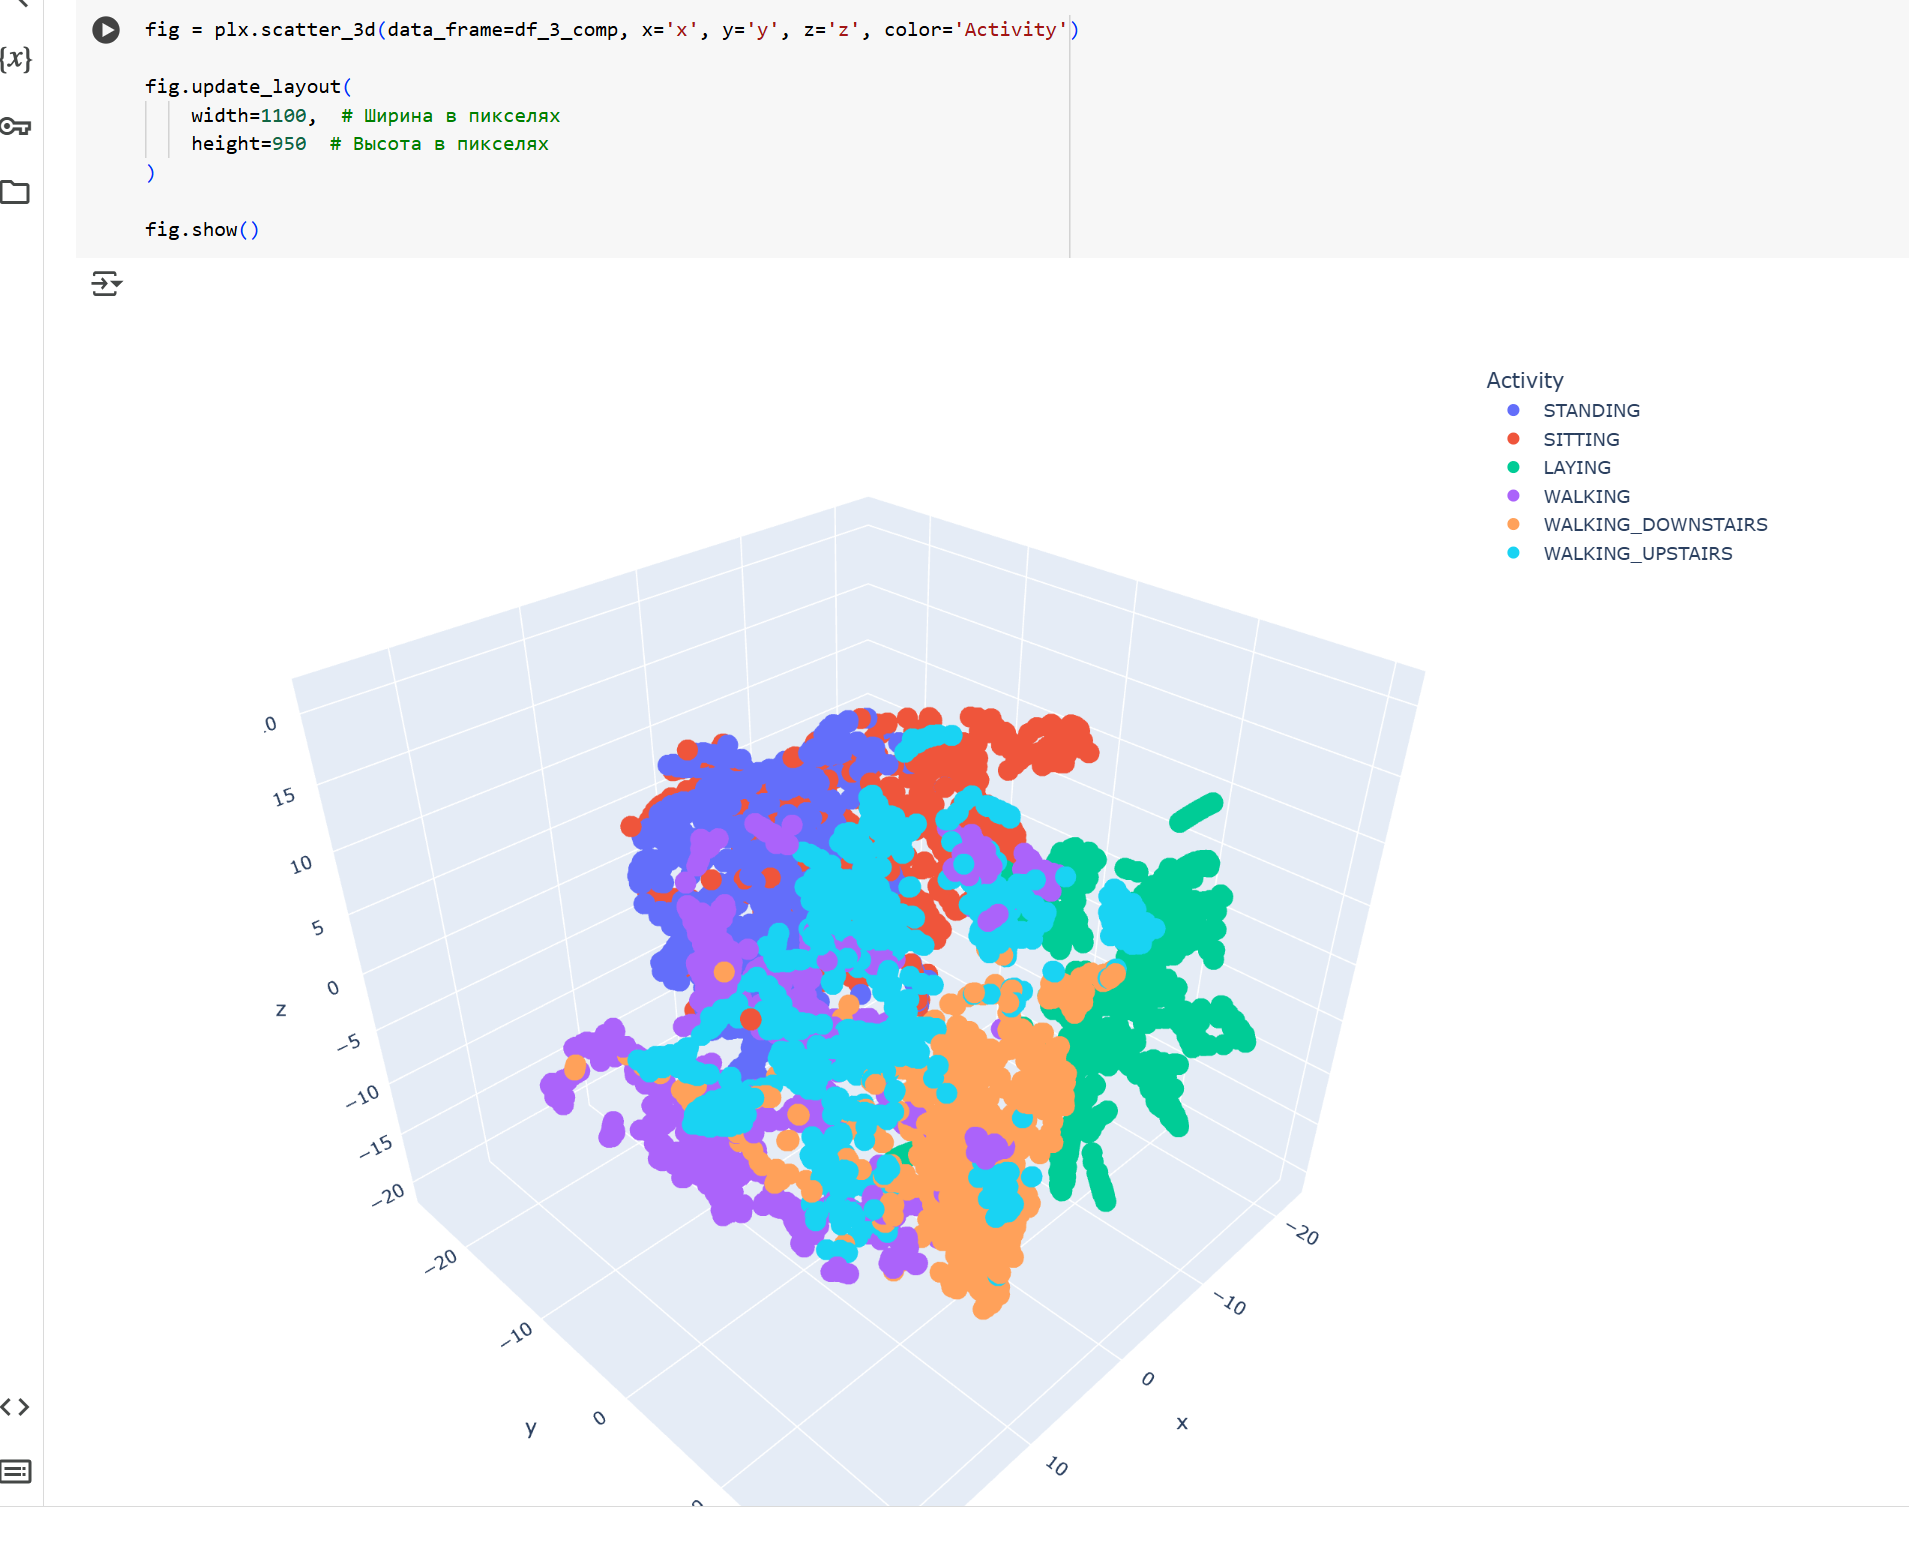

- вообще прикольно получилось
- структура в целом хорошая, кластеры определённые точно можно выделить

### Задание 16 (1 балл)

Мы сделали вам fit. Ваша очередь сделать predict. Допишите функцию, которая принимает на вход датафрейм с признаками, а выдает вектор из предсказаний - для каждой строки датафрейма вы определяете, к какому классу принадлежит объект. Рекомендуем сразу записывать из строками, а не кодировать в числа. Дальше фукнция `accuracy_score` выдаст вам долю правильных ответов.

Подсказка: вы уже отделили категории друг от друга по каким-то признакам. Воспользуйтесь этим знанием! Используя только проведенный вами анализ можно спокойно выбить не менее 75% на train и test! Если вы получите меньше 75%, то балл будет снижен. Авторское решение (на основе всех графиков выше) выбивает 81% и 77% на train и test соответственно.

In [111]:
def predict(df: pd.DataFrame):
    y_pred = np.empty(df.shape[0], dtype='<U40') # создали вектор с будущими предсказаниями
    # всюда далее через фильтрацию по признаку tBodyAccMag-mean() я буду отделять динамически активности от статических и наоборот
    y_pred[df[(df['angle(X,gravityMean)'] > 0) & (df['tBodyAccMag-mean()'] <= -0.5)].index] = 'LAYING' # значение 0 выбрано мной исходя из задания 10, там изи отличить лайинг от всех остальных наглазок просто по углу наклона
    
    y_pred[df[(df['tBodyAccMag-mean()'] <= -0.5) & (df['angle(Y,gravityMean)'] > 0.14)].index] = 'STANDING' # значение 0.14 угла наклона относительно оси Y я украл с правой картинки 12 задания, 
    # число было выбрано так, чтобы побольше отсеять активность sitting, т.к. у standing маленькая дисперсия, а значит достаточно просто попасть в этот узкий диапазон распределения и будет норм
    y_pred[df[(df['tBodyAccMag-mean()'] > -0.5) & (df['angle(X,gravityMean)'] > -0.6)].index] = 'WALKING_UPSTAIRS' # фильтрация по angle(X,gravityMean) не очень, много пересечений с другими динамическими, но я попытался захватить медиану и ещё чуть-чуть
    # так что около 65% от всего признака я точно норм классифицировал    
    y_pred[df[(df['tBodyAccMag-mean()'] > -0.5) & (df['tBodyAcc-max()-X'] > 0.2)].index] = 'WALKING_DOWNSTAIRS' # ускорение по иксу для спуска больше чем у остальных, тут легко отделить признак
    
    y_pred[df[(df['tBodyAccMag-mean()'] > -0.5) & (df['tBodyAcc-max()-X'] < 0.4)].index] = np.where(y_pred[df[(df['tBodyAccMag-mean()'] > -0.5) & (df['tBodyAcc-max()-X'] < 0.4)].index] == '', 'WALKING', y_pred[df[(df['tBodyAccMag-mean()'] > -0.5) & (df['tBodyAcc-max()-X'] < 0.4)].index])
    y_pred[y_pred == ''] = 'SITTING' # после заполнения 5 признаков у нас остались ещё где-то незаполненные позиции, которые мы закинем по остаточному принципу standing
       
    return y_pred

def accuracy_score(y_true, y_pred) -> float:
    y_true = np.asarray(y_true).reshape(-1, 1)
    y_pred = np.asarray(y_pred).reshape(-1, 1)
    return (y_true == y_pred).mean()

In [112]:
train_preds = predict(train)
test_preds = predict(test)
print(f"Accuracy on train set => {round(accuracy_score(train['Activity'], train_preds), 4)}")
print(f"Accuracy on test set => {round(accuracy_score(test['Activity'], test_preds), 4)}")

Accuracy on train set => 0.8078
Accuracy on test set => 0.7611


__Место для мема и/или фидбэка__

- симулятор дизайнера
- не знаю зачем вы даёте такое дз, которое ребята с гум направлений спишут [отсюда](https://www.youtube.com/watch?v=6iFbuIpe68k&t=156s), а с технических [отсюда](https://www.youtube.com/watch?v=AtBk9RSeYJY&t=82s)